In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
from matplotlib.animation import FuncAnimation

# Fonctions

In [3]:
def initialisation(dimensions):
    parametres = {}
    C = len(dimensions)
    
    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [14]:
def forward_propagation(X, parametres):

    activations = {'A0': X}
    
    C = len(parametres) // 2
    
    for c in range(1, C + 1): 
        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

    return activations

In [30]:
def back_propagation(y, activations, parametres):

    m = y.shape[1]
    C = len(parametres) // 2
    
    dZ = activations['A' + str(C)] - y
    
    gradients = {}
    
    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1 / m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
    
    return gradients

In [32]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2
    
    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]
    return parametres

In [35]:
def predict(X, parametres):
  C = len(parametres) // 2
  activations = forward_propagation(X, parametres)
  A = activations['A' + str(C)]
  return A >= 0.5

In [34]:
def log_loss(y, A):
    m = y.shape[1]
    epsilon = 1e-15
    # print(A.shape, y_train.shape)
    return 1 / m * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [33]:
def neural_network(X, y, hidden_layers = (32, 32, 32), learning_rate = 0.1, n_iter = 1000):

    np.random.seed(0)
    
    # initialisation W, b
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation(dimensions)

    train_loss = []
    train_acc = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)

        if i%10 == 0:
            
            C = len(parametres) // 2
            train_loss.append(log_loss(y, activations['A' + str(C)]))
            y_pred = predict(X, parametres)
            current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)

    # Visualisation des résultats
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18, 4))
    ax[0].plot(train_loss, label='train loss')
    ax[0].legend()
    
    ax[1].plot(train_acc, label='train acc')
    ax[1].legend()
    plt.show()

    return parametres

# Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


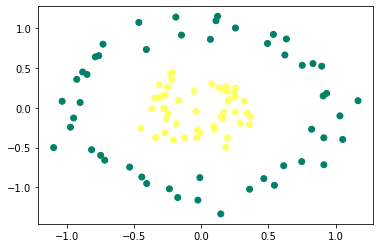

In [36]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 2109.80it/s]


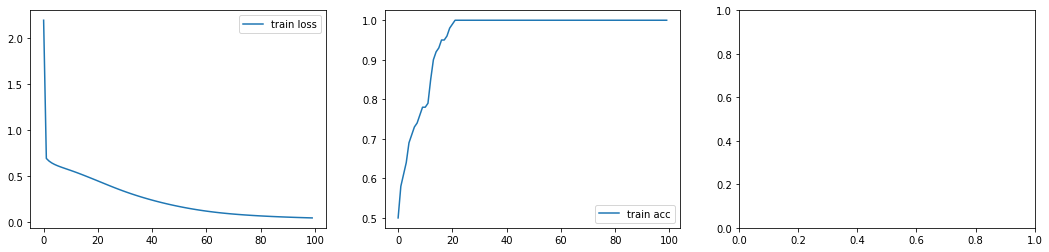

{'W1': array([[ 1.81769058,  0.48641301],
        [ 1.23854714,  1.97607369],
        [ 2.41536964, -1.36089636],
        [ 0.7232829 , -0.44679784],
        [-0.22550461,  1.2898364 ],
        [-0.03428699,  1.56389879],
        [ 1.31954647, -0.06193554],
        [-0.4081929 ,  0.4620787 ],
        [ 2.2642667 , -0.36059596],
        [ 0.52789804, -1.41998815],
        [-2.75202436,  0.54246999],
        [ 1.17895459, -0.89855528],
        [ 2.51122124, -1.60134548],
        [ 0.20005794,  0.30584036],
        [ 1.72207311,  1.75438163],
        [ 0.60011246,  0.78271297],
        [-1.02629484, -1.97146415],
        [-0.90333154,  0.35033362],
        [ 1.76974102,  1.13323525],
        [-0.5297186 , -0.42666132],
        [-1.11348528, -1.76118023],
        [-1.74594485,  2.13337561],
        [-0.0655784 , -0.17770286],
        [-1.44435835,  1.13105741],
        [-1.1282039 , -0.32320097],
        [-0.92115319, -0.02479613],
        [-0.35638325, -1.8246707 ],
        [-0.18219544, 

In [40]:
neural_network(X, y)

### Test initialisation

In [38]:
parametres = initialisation([2, 32, 32, 1])

for key, val in parametres.items():
    print(key, val.shape)

W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


### Test forward

In [39]:
activations = forward_propagation(X, parametres)

for key, val in activations.items():
    print(key, val.shape)

A0 (2, 100)
A1 (32, 100)
A2 (32, 100)
A3 (1, 100)


### Test backward

In [31]:
grad = back_propagation(y, activations, parametres)

for key, val in grad.items():
    print(key, val.shape)

dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)
